In [2]:

import ROOT
import os,sys
import numpy as np

sys.path.append("../python/")
from wjetsAsymmetryFrame import *

#set Multi-thread enabled.
ROOT.ROOT.EnableImplicitMT()

file_path = ['/eos/home-y/yabulait/wjets/sherpa2_8_grid_output/user.yabulait.20200106.mc16_13TeV.421305.Sh_228_Wmunu_EnhLogPtV.Nominal_hist']


for ds in file_path:# +file_path['c_jets']:
    files = [ds+"/"+f for f in os.listdir(ds)]

wjets = wjetsAsymmetryFrame()
print("pool size = ",  ROOT.ROOT.GetImplicitMTPoolSize())
wjets.preselected_data(files,channel='muon')

#catch new RDF pointed to snapshot_test.root
df_preSelected = wjets.snapshot("nominal", "/eos/home-y/yabulait/wjets/root_files/sherpa_28_preselected.root")


pool size =  16


In [3]:

df_positive_deta_lj = df_preSelected.Filter("deta_lj >1.0")
df_positive_Xprep06 = df_preSelected.Filter("Xprep > 0.6")
df_negetive_Xprep06 = df_preSelected.Filter("Xprep < -0.6")

hist = df_positive_deta_lj.Histo1D(("Xprep","Xprep",44,-1.1,1.1), "Xprep","mcEventWeight")
h_deta_p = df_positive_Xprep06.Histo1D(("hEtaPlus","hEtaPlus",16,-4,4), "deta_lj","mcEventWeight")
h_deta_n = df_negetive_Xprep06.Histo1D(("hEtaMinus","hEtaMinus",16,-4,4), "deta_lj","mcEventWeight")


In [4]:
import time
start = time.time()

h_deta_total = h_deta_p.Clone("h_deta_total")
h_deta_total.Add(h_deta_n.Clone())

h_asymmetry =h_deta_p.Clone("h_asymmetry")
h_asymmetry.Add(h_deta_n.Clone(), -1.0)
h_asymmetry.Divide(h_deta_total)

process_time = time.time() - start
print("processing time = %s"%(process_time/60))

processing time = 0.028318885962168375


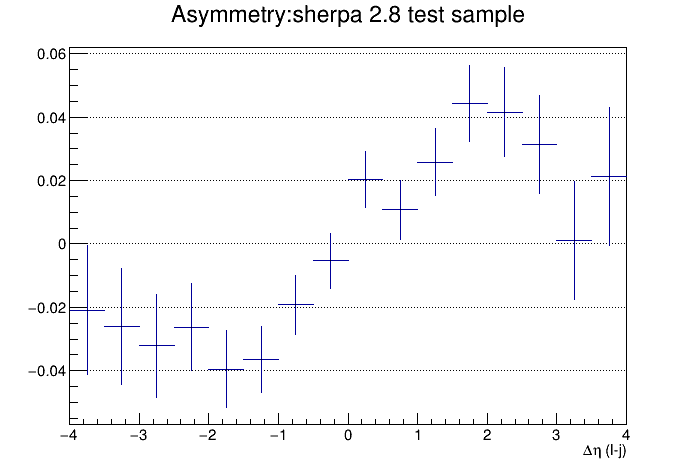

In [6]:
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas()
c1.SetGridy()
h_asymmetry.Draw()
h_asymmetry.SetTitle("Asymmetry:sherpa 2.8 test sample")
h_asymmetry.GetXaxis().SetTitle("#Delta#eta (l-j)")
c1.Draw()
c1.Print('/eos/home-y/yabulait/wjets/plots/sherpa_28_testsample_asymmetry.pdf')

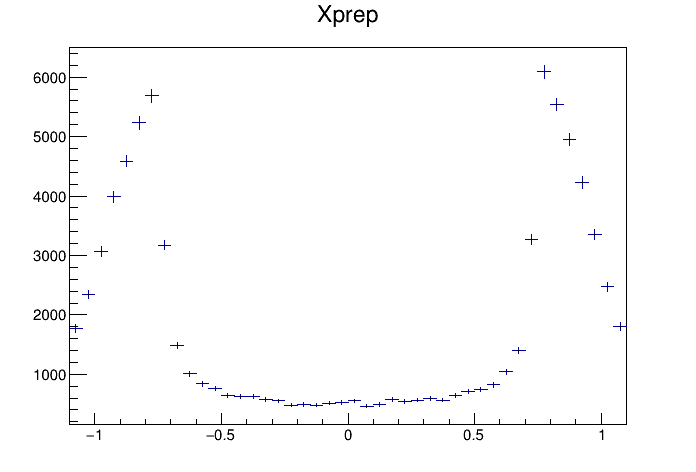

In [8]:
c1 = ROOT.TCanvas()
hist.Draw()
c1.Draw()
c1.Print('/eos/home-y/yabulait/wjets/plots/sherpa_28_testsample_Xprep.pdf')

In [5]:
!jupyter nbconvert --to python wjets_sherpa_28_testsample.ipynb

[NbConvertApp] Converting notebook wjets_snapshot.ipynb to python
[NbConvertApp] Writing 3026 bytes to wjets_snapshot.py
